# Introduction to Machine Learning Using Python and Jupyter Notebook

### 1. Introduction
This tutorial will display how to use Jupyter Notebook and select Python libraries to perform machine learning tasks. The tutorial will be divided into 2 main parts:
- The first example will show a curve fitting regression problem to try and predict future possible values.
- The second example will show how to produce a classification model to predict the type of flower based on the length and width of the petals and sepals.

These examples were chosen because they provide an introduction into some of the most common machine learning tasks that are performed. The first example is a regression problem, which is used to predict a continuous value and the second example is a classification problem, which is used to predict a discrete value. They also provide a good basis for understanding how to use the libraries and how to interpret the results they produce.

Within these examples we will utilise the following libraries:
- [Numpy](http://www.numpy.org/) - A library for performing numerical calculations.
- [Scipy](https://www.scipy.org/) - A library for performing scientific calculations.
- [Matplotlib](https://matplotlib.org/) - A library for producing plots and graphs.
- [Scikit-learn](http://scikit-learn.org/stable/) - A library for performing machine learning tasks.
- [Pandas](https://pandas.pydata.org/) - A library for performing data analysis.

### 2. Objectives
The objectives of this tutorial are to:
- Introduce the Jupyter Notebook environment and how to use it.
- Introduce some of the Python libraries that are useful for machine learning tasks.
- Demonstrate how to perform a regression and classification task using the libraries and this environment.
- Show how the results of the machine learning tasks can be interpreted using the graphical output produced by the libraries.

### 3. Similar Tutorials
There are many similar tutorials available online, however, I have found that most of them are either too advanced for a beginner or they do not provide enough detail to fully understand the concepts. Most of these tutorials also focus on a single problem and do not show the full capabilities of the libraries. Therefore, in this tutorial I will attempt to bridge the gap between the two extremes while adequately explaining and presenting the concepts.

**Key Differences:**
- This tutorial will provide both a regression and classification example.
- The content is kept simplistic while still providing enough detail to understand the concepts.
- The focus is on the libraries and how to use them, rather than the problem itself.

Below is a list of some of the tutorials that have helped me to produce this one:
- [Datacamp Python Machine Learning Tutorial](https://www.datacamp.com/community/tutorials/machine-learning-python)
- [Machine Learning Mastery](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)
- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py)
- [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
- [Python-Jupyter Basics Tutorial](https://courses.cs.ut.ee/MTAT.03.227/2018_spring/uploads/Main/python_tutorial)
- [Getting Started with scikit-learn](https://ipython-books.github.io/81-getting-started-with-scikit-learn/)


### 4. Curve Fitting Regression Example
- We will generate a dataset and then try to fit a function to the data.
- This example will display some of the functionality of these modules to carry out an unsupervised regression analysis.

To use a Jupyter Notebook cell, you can either click on the cell and press the **Run** button at the top of the page or you can press **Shift + Enter**. This will run the code in the cell and display the output below it. The notebook will also keep track of the order in which the cells were run, so you can run them in any order and the notebook will still work. This is useful if you want to go back and change some of the code in a cell and then run it again without having to run the whole script again like you would usually. This is a key advantage of using a notebook over a traditional Python script, it enables us to run the code in a more interactive way providing benefits for both testing and debugging. Adding to this, many of the libraries that we will use in this tutorial have a graphical output which integrates well into the notebook environment. This allows us to see the results in a more visual way integrated into the code instead of the code and output being completely separated. The ability to add markdown cells such as this one, also provides the ability to add text and images to the notebook, which is useful for explaining the code and the results.

**4.1** To begin we need to import the necessary modules for this example. As this is a regression problem we will need to import the *linear_model* module from the **scikit-learn** library.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

**4.2** To start with a deterministic nonlinear function for the model is defined. This function will be used to generate the data that will be used to train the model.

In [658]:
def func(x):
    return np.exp(3*x) + 2*np.exp(-2*x)

**4.3** The values along the curve are then generated using **NumPy** and the declared function.

In [659]:
x_train = np.linspace(0., 2, 200)
y_train = func(x_train)

**4.4** Now we generate the data points using the function _func_ and add Gaussian noise to the dataset. The noise is added to simulate the effect of measurement errors.

In [660]:
x = np.array([.0, .1, .2, .4, .6, .8, 1])
y = func(x) + 2 * np.random.randn(len(x))

**4.5** Now that have the data points we can plot them and produce the curve using **Matplotlib**.

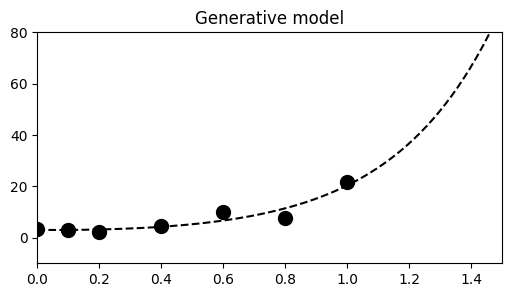

In [661]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')
plt.show()

**4.6** With the generative model established we can use the capabilites of **scikit-learn** to fit a linear model to the data in these three steps:
1. Create the model using Linear Regression
2. Fit the model to the dataset
3. Use the model to predict values

In [662]:
lr = lm.LinearRegression()
lr.fit(x[:, np.newaxis], y)
y_lr = lr.predict(x_train[:, np.newaxis])

**4.7** We now plot the linear regression curve on the graph we produced previously to see how well it fits the data.

Text(0.5, 1.0, 'Linear regression')

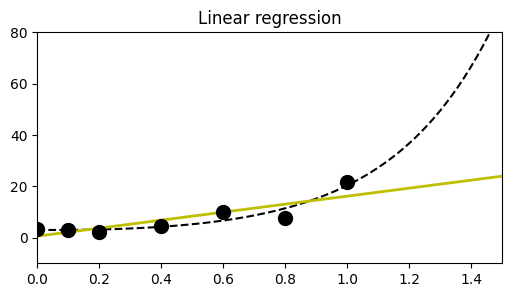

In [663]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
ax.plot(x_train, y_lr, 'y', lw=2)
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Linear regression')

**4.8** The model we have just produced however is not well adapted to the dataset as it is a linear fit whereas the data points generated were produced using a nonlinear model which results in an exponential curve. Therefore, for this data a nonlinear model is more appropriate. We can achieve this by still using linear regression but we have to use the **NumPy** function *np.vander()* which allows us to create a Vandermonde matrix. With this matrix we can then fit a polynomial to the data, the degree of the polynomial is the number of columns in the matrix. The following code shows how to do this and provides the visualtion of the fit for a range of polynomial degrees.

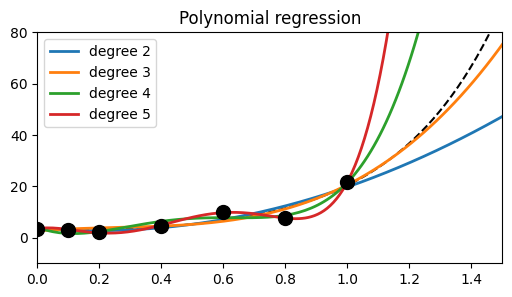

In [664]:
lrpoly = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
for deg in [2, 3, 4, 5]:
    lrpoly.fit(np.vander(x, deg+1), y)
    y_lrpoly = lrpoly.predict(np.vander(x_train, deg+1))
    ax.plot(x_train, y_lrpoly, label='degree {}'.format(deg), lw=2)
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Polynomial regression')
ax.legend(loc=2)

**4.9** From the results of this we can see that all the polynomial models fit the preexisting data relatively well but the higher the degree of the polynomial the more likely it is to overfit the data for future predictions. This is because the model is more complex and therefore has more parameters to fit to the data, which causes a problem as the model will not generalise well to new data. Therefore we need to find a balance between the complexity of the model and the amount of data we have. This is known as the bias-variance tradeoff, a model with high bias will not fit the data well and a model with high variance will overfit the data. In the next section we will look at a separate model available in **scikit-learn** to see if it can produce a better fit.

**4.10** We can use a separate model called ridge regression which works in a similar way to linear regression but it prevents the polynomial coefficients from becoming too large in turn reducing the variance of the model. The following code shows how to use ridge regression to fit a polynomial to the data and provides the visualisation of the fit for a range of degrees.

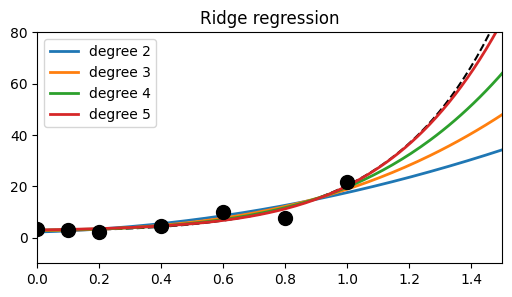

In [665]:
ridge = lm.RidgeCV()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train, y_train, '--k')
for deg in [2, 3, 4, 5]:
    ridge.fit(np.vander(x, deg+1), y)
    y_ridge = ridge.predict(np.vander(x_train, deg+1))
    ax.plot(x_train, y_ridge, label='degree {}'.format(deg), lw=2)
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Ridge regression')
ax.legend(loc=2)

**4.11 Results** 

The results from the ridge regression model show that the issue of overfitting has been mititgated but for the simpler polynomial degrees there is now more underfitting than before. This can likely be attributed to the coefficients being used in the model being smaller than before which is because of the ridge regression. Overall though the model is still able to fit the data pretty well, from the results we can see that the best fit is achieved with a polynomial of degree 5 which almost exactly follows the curve of the generative model.

There are many more models available in **scikit-learn** that can be used to fit a curve to the data that can be tested to see which one produces the best fit. The following link provides a list of the models available and a description of each one: [Scikit-learn Models](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

### 5. Iris Classification Example
This part of the tutorial will display how to use the **scikit-learn** library to perform a classification task. The dataset that will be used is the Iris dataset which is a well known dataset that is used to demonstrate the capabilities of machine learning algorithms. The dataset contains 150 samples of 3 different species of Iris flower (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, a model can be trained to predict the species of Iris.

**5.1** For this example we will import **pandas** which is a useful module for displaying data in a tabular format and import the Iris dataset from the **scikit-learn** library.

In [666]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

**5.2** With the dataset imported we can now use the pandas module to display the data in a tabular format.

In [667]:
irisdf = pd.DataFrame(iris['data'], columns = iris['feature_names'])
irisdf['target'] = pd.Series(iris['target'], name = 'target_values')
irisdf['target_name'] = irisdf['target'].replace([0,1,2],
['iris-' + species for species in iris['target_names'].tolist()])
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,iris-setosa
1,4.9,3.0,1.4,0.2,0,iris-setosa
2,4.7,3.2,1.3,0.2,0,iris-setosa
3,4.6,3.1,1.5,0.2,0,iris-setosa
4,5.0,3.6,1.4,0.2,0,iris-setosa


**5.3** We can also use the **pandas** module to display the data in a **matplotlib** scatter graph.

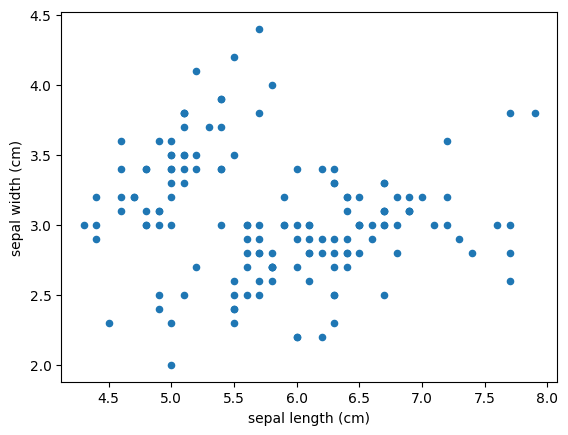

In [668]:
irisdf.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')
plt.show()

**5.4** To further represent the data we can calculate the interquartile range to determine the outliers and then remove them from the dataset. The outliers are plotted in red in the following graph.

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

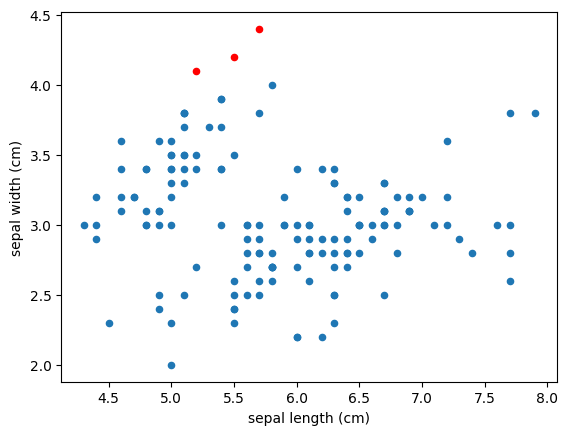

In [669]:
IQR = irisdf["sepal width (cm)"].quantile(0.75) - irisdf["sepal width (cm)"].quantile(0.25)
outliers = irisdf[irisdf["sepal width (cm)"] > irisdf["sepal width (cm)"].quantile(0.75) + 1.5*IQR]
usual = irisdf.drop(outliers.index)
ax = usual.plot(x="sepal length (cm)", y="sepal width (cm)", kind="scatter")
outliers.plot(x="sepal length (cm)", y="sepal width (cm)", kind="scatter", c="red", ax=ax)

**5.5** Now that we have the data we can use the scikit-learn module to train a model to classify the dataset. 
- The first step in this process is to split the data into a training set and a test set. We can do this using the *train_test_split()* function from **scikit-learn**.
- During this process we also need to specify the proportion of the data that will be used for training and testing. This is done by setting the *test_size* parameter to the desired proportion. In this case we will use 30% of the data for testing and 70% for training.

In [682]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(irisdf.drop(["target_name", "target"], axis=1), irisdf["target_name"], test_size=0.3, random_state=0)

**5.6** The classifying model we will use is the K-Nearest Neighbors model. This works by finding the nearest neighbors to a data point and then classifying it based on the majority class of the neighbors. 

In [683]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**5.7** We can now use the model to calculate the accuracy of the predictions it makes on the test set. This is done by using the *score()* function.

In [684]:
knn.score(X_train, y_train)
knn.score(X_test, y_test)

0.9777777777777777

**5.8** **scikit-learn** provides a range of metrics to analyse results, for this example we will use accuracy score, a classification report and a confusion matrix.
- We let the model predict the classes of the test set and compare the results to the actual classes.
- We can see that the model has a high accuracy score, high precision and recall for each class. This means that the model is performing well and is able to classify the data points correctly.

In [685]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9777777777777777
Classification report:
                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        16
iris-versicolor       1.00      0.94      0.97        18
 iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
